Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(45000, 32, 32, 3)
(45000, 10)
Using real-time data augmentation.
Epoch 1/50
352/352 [==============================] - 30s 85ms/step - loss: 1.5625 - accuracy: 0.4338 - val_loss: 1.2119 - val_accuracy: 0.5733
Epoch 2/50
352/352 [==============================] - 23s 66ms/step - loss: 1.2306 - accuracy: 0.5595 - val_loss: 1.1278 - val_accuracy: 0.5999
Epoch 3/50
352/352 [==============================] - 23s 66ms/step - loss: 1.1007 - accuracy: 0.6094 - val_loss: 0.9847 - val_accuracy: 0.6511
Epoch 4/50
352/352 [==============================] - 23s 65ms/step - loss: 0.9990 - accuracy: 0.6468 - val_loss: 0.9406 - val_accuracy: 0.6742
Epoch 5/50
352/352 [==============================] - 23s 65ms/step - loss: 0.9503 - accuracy: 0.6626 - val_loss: 0.8852 - val_accuracy: 0.6948
Epoch 6/50
352/352 [==============================] - 23s 64ms/step - loss: 0.9006 - ac

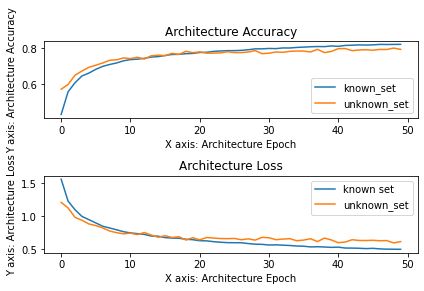

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import time
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



batch_size = 128
num_classes = 10
epochs = 50
data_augmentation = True
num_predictions = 20

start= time.time()
#importing data
(train_data,train_label), (test_data,test_label)= cifar10.load_data()
print(train_data.shape,train_label.shape, test_data.shape, test_label.shape)


# Preprocessing
train_data=( train_data.astype('float') )
test_data=( test_data.astype('float') )
train_data /= 255.0
test_data /= 255.0

# Normalizing data
# Calculating mean image 
mean_image = np.mean(train_data, axis=0) 
# Calculating standard deviation 
std = np.std(train_data, axis=0)  

# Subtracting calculated mean image from datasets
train_data -= mean_image
test_data -= mean_image

# Dividing then every dataset by standard deviation
train_data /= std
test_data /= std

# Convert class vectors to binary class matrices.
train_label = keras.utils.to_categorical(train_label, num_classes)
test_label = keras.utils.to_categorical(test_label, num_classes)

X_train, X_test, Y_train, Y_test = train_test_split(train_data, train_label, test_size=0.1, random_state=0, stratify= train_label)
print(X_train.shape)
print(Y_train.shape)



#model making
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# optimizer
model.compile(loss='categorical_crossentropy',optimizer='Adam' ,metrics=['accuracy'])


#data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(test_label, test_label),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    # patient early stopping
    history = model.fit_generator(datagen.flow(X_train, Y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(test_data, test_label),
                        workers=4)

# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'removerandomsamples_ACC80%_for_32_64_batch128.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(test_data, test_label, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

model.summary()


#Plot
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Architecture Accuracy')
plt.ylabel('Y axis: Architecture Accuracy')
plt.xlabel('X axis: Architecture Epoch')
plt.legend(['known_set', 'unknown_set'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Architecture Loss')
plt.ylabel('Y axis: Architecture Loss')
plt.xlabel('X axis: Architecture Epoch')
plt.legend(['known set', 'unknown_set'], loc='upper right')

plt.tight_layout()
end=time.time()
print('Total Time:', end- start)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(40000, 32, 32, 3)
(40000, 10)
Using real-time data augmentation.
Epoch 1/50
313/313 [==============================] - 20s 64ms/step - loss: 1.5980 - accuracy: 0.4196 - val_loss: 1.2515 - val_accuracy: 0.5415
Epoch 2/50
313/313 [==============================] - 19s 62ms/step - loss: 1.2383 - accuracy: 0.5541 - val_loss: 1.1023 - val_accuracy: 0.5981
Epoch 3/50
313/313 [==============================] - 20s 62ms/step - loss: 1.1043 - accuracy: 0.6090 - val_loss: 1.0223 - val_accuracy: 0.6467
Epoch 4/50
313/313 [==============================] - 19s 61ms/step - loss: 1.0192 - accuracy: 0.6366 - val_loss: 1.0096 - val_accuracy: 0.6497
Epoch 5/50
313/313 [==============================] - 19s 61ms/step - loss: 0.9546 - accuracy: 0.6620 - val_loss: 0.8995 - val_accuracy: 0.6849
Epoch 6/50
313/313 [==============================] - 19s 61ms/step - loss: 0.9092 - accuracy: 0.6797 - val_loss: 0.8974 - val_accuracy: 0.6916
Epoch 7/50

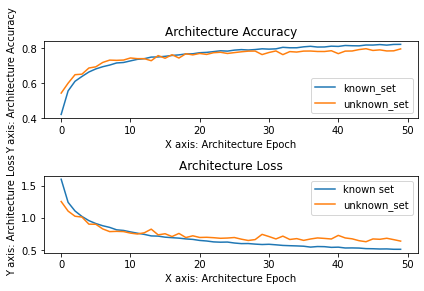

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import time
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



batch_size = 128
num_classes = 10
epochs = 50
data_augmentation = True
num_predictions = 20

start= time.time()
#importing data
(train_data,train_label), (test_data,test_label)= cifar10.load_data()
print(train_data.shape,train_label.shape, test_data.shape, test_label.shape)


# Preprocessing
train_data=( train_data.astype('float') )
test_data=( test_data.astype('float') )
train_data /= 255.0
test_data /= 255.0

# Normalizing data
# Calculating mean image 
mean_image = np.mean(train_data, axis=0) 
# Calculating standard deviation 
std = np.std(train_data, axis=0)  

# Subtracting calculated mean image from datasets
train_data -= mean_image
test_data -= mean_image

# Dividing then every dataset by standard deviation
train_data /= std
test_data /= std

# Convert class vectors to binary class matrices.
train_label = keras.utils.to_categorical(train_label, num_classes)
test_label = keras.utils.to_categorical(test_label, num_classes)

X_train, X_test, Y_train, Y_test = train_test_split(train_data, train_label, test_size=0.2, random_state=0, stratify= train_label)
print(X_train.shape)
print(Y_train.shape)



#model making
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# optimizer
model.compile(loss='categorical_crossentropy',optimizer='Adam' ,metrics=['accuracy'])


#data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(test_label, test_label),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    # patient early stopping
    history = model.fit_generator(datagen.flow(X_train, Y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(test_data, test_label),
                        workers=4)

# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'removerandomsamples_ACC80%_for_32_64_batch128.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(test_data, test_label, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

model.summary()


#Plot
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Architecture Accuracy')
plt.ylabel('Y axis: Architecture Accuracy')
plt.xlabel('X axis: Architecture Epoch')
plt.legend(['known_set', 'unknown_set'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Architecture Loss')
plt.ylabel('Y axis: Architecture Loss')
plt.xlabel('X axis: Architecture Epoch')
plt.legend(['known set', 'unknown_set'], loc='upper right')

plt.tight_layout()
end=time.time()
print('Total Time:', end- start)